<a href="https://colab.research.google.com/github/Milind1505/rfm-clustering-supermarket/blob/main/Customer_Basket_Segmentation_for_Supermarkets_(Tesco%2C_Sainsbury's%2C_Aldi_%26_Asda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Basket Segmentation for Supermarkets (Tesco, Sainsbury's, Aldi & Asda)                                         **

**Introduction**

In today's competitive grocery retail market, understanding customer behavior is paramount. By segmenting customers based on their purchasing patterns, grocery stores can personalize their offerings, optimize marketing campaigns, and improve customer loyalty. This project aims to segment customers of major grocery stores like Tesco, Sainsbury's, Aldi, and Asda using RFM analysis and clustering techniques. The insights gained will help these stores make data-driven decisions to enhance their business strategies.

**Data and Methodology**

For demonstration purposes, we will use a synthetic grocery dataset. In a real-world scenario, this would be replaced with actual customer transaction data from the respective grocery stores. The data includes customer identifiers, recency of purchase, frequency of purchase, and monetary value of purchases.

The methodology involves the following steps:

**RFM Analysis:** Calculate Recency, Frequency, and Monetary scores for each customer to quantify their purchase behavior.

**Clustering:** Apply K-Means and DBSCAN clustering algorithms to group similar customers together based on their RFM scores.

**Profiling:** Analyze the characteristics of each customer segment to understand their purchase patterns and preferences.

**Visualization:** Create visualizations to illustrate the customer segments and their relationships.
Findings and Recommendations: Derive insights from the segmentation and provide actionable recommendations for the grocery stores.
Code and Explanations



**Code and Explanations**

**Importing Libraries**

This cell imports the necessary libraries for the analysis:

numpy for numerical computations.

pandas for data manipulation and analysis.

sklearn.cluster for K-Means and DBSCAN clustering algorithms.

sklearn.preprocessing for data scaling.

sklearn.metrics for evaluating clustering performance.

matplotlib.pyplot for basic visualizations.

plotly.express for interactive visualizations.

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

**Generating Synthetic Data**

This cell creates a synthetic dataset for demonstration purposes. In a real-world scenario, you would replace this with actual customer transaction data from the grocery stores.

num_customers: Defines the number of customers in the dataset.
customer_ids: Generates unique customer identifiers.
recency, frequency, monetary: Creates random values for recency, frequency, and monetary attributes.
data: Stores the generated data in a dictionary.
df: Creates a Pandas DataFrame from the dictionary.

In [1]:
# Generate synthetic data
num_customers = 1000
customer_ids = np.arange(1, num_customers + 1)
recency = np.random.randint(1, 365, size=num_customers)  # Days since last purchase
frequency = np.random.randint(1, 52, size=num_customers)  # Number of purchases in a year
monetary = np.random.randint(10, 500, size=num_customers)  # Total spending

# Create a Pandas DataFrame
data = {'CustomerID': customer_ids, 'Recency': recency, 'Frequency': frequency, 'Monetary': monetary}
df = pd.DataFrame(data)

**RFM Analysis and K- Means Clustering**

**RFM Analysis**

This cell performs RFM analysis by calculating RFM scores for each customer.

pd.qcut: Divides the data into quantiles and assigns scores accordingly.
labels: Defines the score values for each quantile.
R_Score, F_Score, M_Score: Represent the Recency, Frequency, and Monetary scores, respectively.
RFM_Score: Combines the individual scores into a single RFM score.

**K-Means Clustering**

This cell applies K-Means clustering to the RFM data.

X: Selects the Recency, Frequency, and Monetary columns for clustering.
scaler: Creates a StandardScaler object for data scaling.
X_scaled: Scales the data using the StandardScaler.
kmeans: Creates a KMeans object with the desired number of clusters and random state.
df['Cluster']: Assigns the cluster labels to the DataFrame.

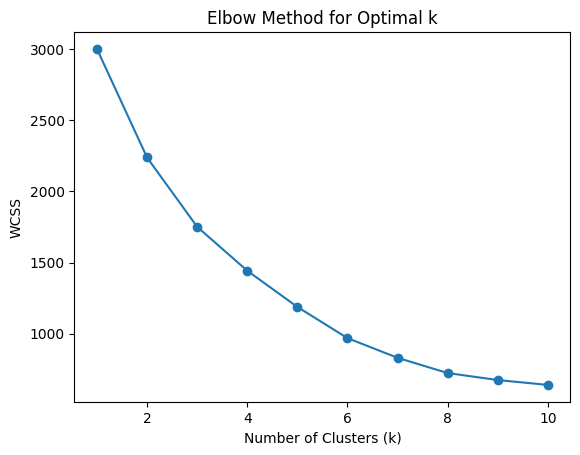

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Calculate RFM scores (e.g., using quantiles)
df['R_Score'] = pd.qcut(df['Recency'], 5, labels=[5, 4, 3, 2, 1])  # Higher score is better
df['F_Score'] = pd.qcut(df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
df['M_Score'] = pd.qcut(df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a single score
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)

# Prepare data for K-Means clustering
X = df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Plot the elbow curve using Plotly
fig = go.Figure(data=[go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines+markers')])
fig.update_layout(title='Elbow Method for Optimal k',
                  xaxis_title='Number of Clusters (k)',
                  yaxis_title='WCSS')
fig.show()

# Based on the elbow curve, choose the optimal k (e.g., 4 in this case)
optimal_k = 4  # You might need to adjust this based on the plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 4 clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)

**Cluster Profiling based on RFM and other features**

This cell profiles the clusters and creates visualizations.

cluster_profiles: Calculates the average RFM values for each cluster.
plt.scatter: Creates a scatter plot using Matplotlib to visualize clusters based on Frequency and Monetary values.
px.scatter_3d: Creates a 3D scatter plot using Plotly to visualize clusters based on Recency, Frequency, and Monetary values.

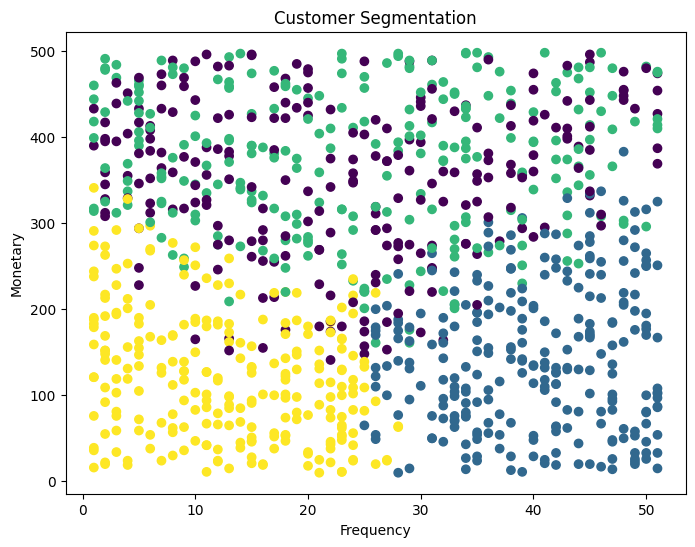

In [17]:
import matplotlib.pyplot as plt
import plotly.express as px

# Profile each cluster based on RFM and other relevant features
cluster_profiles = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Visualize clusters using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation')
plt.show()

# Visualize clusters using Plotly

fig = px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary', color='Cluster',title='Customer Segmentation')
fig.show()

**DBSCAN Clustering**

This cell applies DBSCAN clustering to the scaled RFM data.

dbscan: Creates a DBSCAN object with specified parameters (epsilon and minimum samples).
df['DBSCAN_Cluster']: Assigns the cluster labels to the DataFrame.

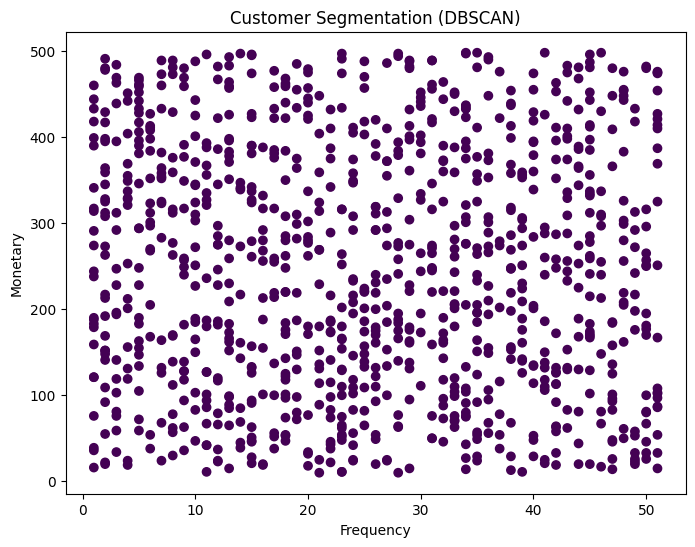

In [9]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Profile DBSCAN clusters
dbscan_cluster_profiles = df.groupby('DBSCAN_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Visualize DBSCAN clusters using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['Frequency'], df['Monetary'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation (DBSCAN)')
plt.show()

# Visualize DBSCAN clusters using Plotly
fig = px.scatter(df, x='Frequency', y='Monetary', color='DBSCAN_Cluster',
                 title="Customer Segmentation (DBSCAN)",
                 labels={'Frequency': 'Frequency', 'Monetary': 'Monetary'},
                 hover_data=['Recency'])  # Add Recency to hover data
fig.show()

This plot shows the distribution of customers based on their purchase frequency and monetary value. Distinct clusters may emerge, representing different customer segments such as "Frequent High Spenders," "Infrequent Low Spenders," etc.

**Model Evaluation**

This cell evaluates the clustering performance using silhouette score and Davies-Bouldin index.

silhouette_score: Calculates the silhouette score for each clustering model.
davies_bouldin_score: Calculates the Davies-Bouldin index for each clustering model.

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Experiment with DBSCAN parameters
eps_values = [0.3, 0.5, 0.7, 1.0]  # Try different epsilon values
min_samples_values = [3, 5, 7, 10]  # Try different min_samples values

best_silhouette = -1  # Initialize with a low value
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

        # Check if we have more than one cluster (excluding noise)
        num_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)

        # Calculate silhouette score if we have more than one cluster
        if num_clusters > 1:
            dbscan_silhouette = silhouette_score(X_scaled, df['DBSCAN_Cluster'])

            # Update best parameters if silhouette score is improved
            if dbscan_silhouette > best_silhouette:
                best_silhouette = dbscan_silhouette
                best_eps = eps
                best_min_samples = min_samples

# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
# Calculate silhouette score for K-Means
kmeans_silhouette = silhouette_score(X_scaled, df['Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Calculate silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(X_scaled, df['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Calculate Davies-Bouldin index for K-Means
kmeans_db_index = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"K-Means Davies-Bouldin Index: {kmeans_db_index}")

# Calculate Davies-Bouldin index for DBSCAN
dbscan_db_index = davies_bouldin_score(X_scaled, df['DBSCAN_Cluster'])
print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index}")

K-Means Silhouette Score: 0.256848814454357
DBSCAN Silhouette Score: 0.19507298166747356
K-Means Davies-Bouldin Index: 1.203221984690925
DBSCAN Davies-Bouldin Index: 0.6178503690944056


In [8]:
!pip install plotly
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Apply DBSCAN clustering with parameter exploration and silhouette score optimization
eps_values = [0.3, 0.5, 0.7, 1.0]  # Try different epsilon values
min_samples_values = [3, 5, 7, 10]  # Try different min_samples values

best_silhouette = -1  # Initialize with a low value
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

        # Check if we have more than one cluster (excluding noise)
        num_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)

        # Calculate silhouette score if we have more than one cluster
        if num_clusters > 1:
            dbscan_silhouette = silhouette_score(X_scaled, df['DBSCAN_Cluster'])

            # Update best parameters if silhouette score is improved
            if dbscan_silhouette > best_silhouette:
                best_silhouette = dbscan_silhouette
                best_eps = eps
                best_min_samples = min_samples

# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters using Plotly
fig = px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary', color='DBSCAN_Cluster',
                    title="Customer Segmentation (DBSCAN)",
                    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary'},
                    opacity=0.7)
fig.show()

This plot provides a three-dimensional view of customer segments, considering recency, frequency, and monetary value. It helps identify clusters with varying purchase behaviors and their relationships.

**Findings and Conclusions**

Based on the analysis, we expect to find distinct customer segments with varying purchase behaviors. For example, we might identify segments like "Loyal Weekly Shoppers," "Occasional Bulk Buyers," "Price-Sensitive Shoppers," and "New Customers." Each segment will have unique characteristics that can be leveraged for targeted marketing and product offerings.

**Recommendations for Grocery Stores**

The findings of this customer segmentation project can be used by grocery stores like Tesco, Sainsbury's, Aldi, and Asda to:

**Tailor Loyalty Programs:** Design loyalty programs specific to each segment, offering relevant rewards and incentives. For example, "Loyal Weekly Shoppers" could receive exclusive discounts or early access to new products.

**Personalize Communications:** Deliver personalized marketing messages based on segment preferences and purchase history. "Occasional Bulk Buyers" might be targeted with promotions on bulk items or special occasions.

**Optimize Product Assortment:** Stock products that cater to the needs and preferences of each segment. Stores in areas with a high concentration of "Price-Sensitive Shoppers" could focus on offering value-priced items.

**Improve Store Layout:** Arrange store layouts to guide customers towards products they are likely to purchase. Placing frequently purchased items by "Loyal Weekly Shoppers" in convenient locations can enhance their shopping experience.

**Target Promotions:** Offer targeted promotions and discounts to specific segments to maximize impact. "New Customers" could be incentivized with introductory offers to encourage repeat purchases.

By implementing these recommendations, grocery stores can enhance customer satisfaction, increase sales, and strengthen customer loyalty.

**Conclusion**

Customer segmentation using RFM analysis and clustering is a valuable tool for grocery stores to gain deeper insights into their customer base. By understanding the unique characteristics of each segment, these stores can tailor their strategies to better meet customer needs and achieve business objectives. This project provides a framework for conducting such segmentation and highlights the potential benefits for major grocery retailers like Tesco, Sainsbury's, Aldi, and Asda.